# Ford GoBike – Explaining Trip Duration 
## by Mengting Tang

## Investigation Overview

> In this analysis, I want to investigate the interaction between features of the users and their corresponding trip durations to better predict the latter.

## Dataset Overview

> This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area in February 2019.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.dropna()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Distribution of Trip Duration

> Trip duration shows a rather wide range, from around 1 minute to more than 300 minutes, with the peak at around 10 minutes, indicating that trips lasting for 10 minutes occur the most. 

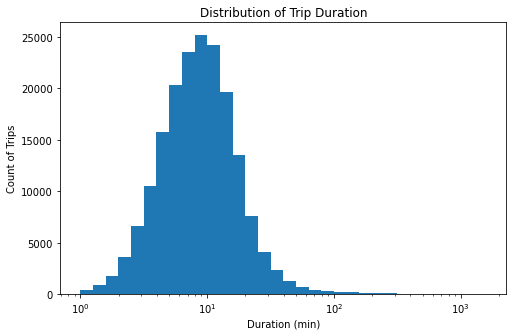

In [8]:
# convert duration in seccond to in minute for better understanding
df['duration_min'] = df.duration_sec.div(60)

# plot trip duration in minute in logarithmic scale

bins = 10 ** np.arange(0, np.log10(df.duration_min.max())+0.1, 0.1)
ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300]
plt.figure(figsize = [8, 5])
plt.hist(data = df, x = 'duration_min', bins = bins)
labels = ['{}'.format(v) for v in ticks]
plt.xticks(ticks, labels)
plt.title('Distribution of Trip Duration')
plt.xlabel('Duration (min)')
plt.ylabel('Count of Trips')
plt.xscale('log')
plt.show()

## User Type and Trip Duration

> Subscribers tend to ride bikes for shorter duration, while customers longer. This might be attributed to their respective purposes – subscribers, with more constant needs, ride bikes for routinely activities, while customers might ride bikes for sight-seeing purposes. Further customizations could be made to tap into their respective usage patterns and needs.

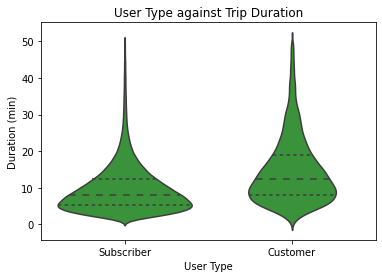

In [20]:
base_color = sb.color_palette()[2]
sb.violinplot(data = df.query('duration_min < 50'), x = 'user_type', y = 'duration_min', inner = 'quartile', color = base_color)
plt.xlabel('User Type')
plt.ylabel('Duration (min)')
plt.title('User Type against Trip Duration');

## Trip Duration against Gender and Age
> In both female and male users, the age group of 10 to 20 has the longest duration. In all three gender types, users above 50 show the second longest duration. It's possible that the former age group uses bikes to commute to school, while the latter group rides bikes more slowly, leading to longer duration. More measures could be taken to ensure user experience in accordance with usage patterns of different age groups.


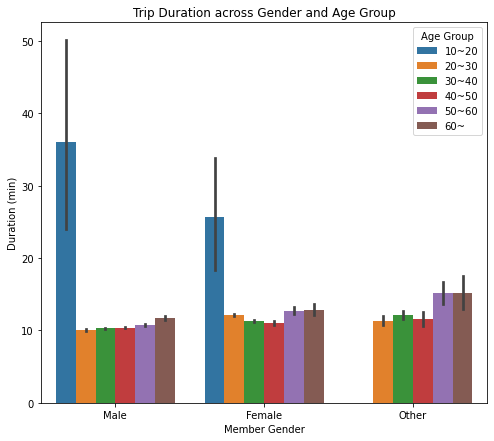

In [22]:
# Relationship between trip duration, gender and age
plt.figure(figsize = [8, 7])
df['age'] = 2021 - df['member_birth_year']
df['age_group'] = df['age'].apply(lambda x: '10~20' if 10 < x <= 20
                                        else '20~30' if 20 < x <= 30
                                        else '30~40' if 30 < x <= 40
                                        else '40~50' if 40 < x <= 50
                                        else '50~60' if 50 < x <= 60
                                        else '60~')

g = sb.barplot(data = df.query('duration_min < 120').sort_values(by = 'age_group'), x = 'member_gender', y = 'duration_min', hue = 'age_group');
h, l = g.get_legend_handles_labels()
g.legend(h, l, title = 'Age Group');
plt.xlabel('Member Gender')
plt.ylabel('Duration (min)')
plt.title('Trip Duration across Gender and Age Group');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert slide_deck_template.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [ ]:
!jupyter nbconvert Ford_slide_deck.ipynb --to slides --post serve  --no-input --no-prompt

[NbConvertApp] Converting notebook Ford_slide_deck.ipynb to slides
[NbConvertApp] Writing 331852 bytes to Ford_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Ford_slide_deck.slides.html
Use Control-C to stop this server
